## IPL MATCH DATASET

---

**AIM**

    The aim of this project is to predict the winner of an IPL match based on various features.

---

**MAIN OBJECTIVES**

    1.Data Loading and Understanding
    
    2.Data Cleaning

    3.Exploratory Data Analysis (EDA)

    4.Data Preprocessing

    5.Model Training

    6.Model Evaluation

    7.Model Comparison
    
    8.Hyperparameter Tuning

---

**IMPORTING LIBRARIES**

    pandas(pd) - Data frame.

    numpy(np) - To do mathematical operations.

    matplotlib(plt) - To make basic plots.

    seaborn(sns) - To make advanced and good-looking charts.

In [606]:
import pandas as pd                                              
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

---

**1.Data Loading and Understanding**

---

In [607]:
ipl=pd.read_csv("ipl.csv")

In [608]:
print('Initial shape:',ipl.shape)

Initial shape: (756, 18)


In [609]:
ipl=ipl.drop_duplicates()
ipl.shape

(756, 18)

In [610]:
ipl.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,5/4/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,6/4/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,7/4/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,8/4/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,8/4/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [611]:
ipl.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,5/5/2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,7/5/2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,8/5/2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10/5/2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12/5/2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [612]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [613]:
ipl.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


---

**2.Data Cleaning**

---

In [614]:
ipl.drop(["id","umpire1","umpire2","umpire3"],axis=1,inplace=True)
ipl.shape

(756, 14)

In [615]:
ipl["Season"] = ipl["Season"].str.extract(r"(\d{4})")

In [616]:
ipl['city'] = ipl['city'].replace({'Bangalore': 'Bengaluru'})

In [617]:
ipl['date'] = ipl['date'].astype(str)

In [618]:
ipl['date'] = ipl['date'].str.replace('-', '/', regex=True) 
ipl['date'] = pd.to_datetime(ipl['date'], format='%d/%m/%Y', errors='coerce')
ipl['month'] = ipl['date'].dt.month

In [619]:
ipl['month'].unique()

array([4, 5, 6, 3], dtype=int32)

In [620]:
ipl.drop(["date"],axis=1,inplace=True)

In [621]:
ipl[["team1", "team2","toss_winner", "winner"]] = ipl[["team1", "team2","toss_winner", "winner"]].replace({
    "Rising Pune Supergiants": "Rising Pune Supergiant",
    "Delhi Daredevils": "Delhi Capitals",
    "Kings XI Punjab": "Punjab Kings"})

In [622]:
ipl['venue'] = ipl['venue'].replace({'M Chinnaswamy Stadium': 'M. Chinnaswamy Stadium',
                                     'Feroz Shah Kotla': 'Arun Jaitley Stadium',
                                     'Feroz Shah Kotla Ground': 'Arun Jaitley Stadium',
                                     'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
                                     'IS Bindra Stadium': 'Punjab Cricket Association IS Bindra Stadium, Mohali',
                                     'ACA-VDCA Stadium': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
                                     "M. A. Chidambaram Stadium":'MA Chidambaram Stadium, Chepauk',
                                     'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium, Uppal',
                                     'OUTsurance Oval':'Mangaung Oval',
                                     'Sardar Patel Stadium, Motera':'Narendra Modi Stadium, Motera',
                                     'Subrata Roy Sahara Stadium':'Maharashtra Cricket Association Stadium, Pune'})

In [623]:
ipl.nunique()

Season              12
city                31
team1               13
team2               13
toss_winner         13
toss_decision        2
result               3
dl_applied           2
winner              13
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               34
month                4
dtype: int64

---

**Handling Missing Values**

---

In [624]:
ipl.isnull().sum()

Season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
month              0
dtype: int64

In [625]:
ipl['city'] = ipl['city'].fillna(ipl['venue'].map({'Dubai International Cricket Stadium': 'Dubai'}))

In [626]:
ipl['winner'] = ipl['winner'].replace(['', ' ', 'NaN', 'nan'], np.nan)

ipl = ipl.dropna(subset=['winner']).reset_index(drop=True)

ipl.shape

(752, 14)

In [627]:
ipl.isnull().sum()

Season             0
city               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
month              0
dtype: int64

In [628]:
ipl['Season'] = ipl['Season'].astype(int)

In [629]:
ipl.dtypes

Season              int64
city               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
month               int32
dtype: object

---

**Overview Of Data After Cleaning**

---

In [630]:
ipl.head()

,Season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,month
0,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",4
1,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,4
2,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,4
3,2017,Indore,Rising Pune Supergiant,Punjab Kings,Punjab Kings,field,normal,0,Punjab Kings,0,6,GJ Maxwell,Holkar Cricket Stadium,4
4,2017,Bengaluru,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M. Chinnaswamy Stadium,4


In [631]:
ipl.tail()

,Season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,month
747,2019,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,5
748,2019,Chennai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,"MA Chidambaram Stadium, Chepauk",5
749,2019,Visakhapatnam,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,5
750,2019,Visakhapatnam,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,5
751,2019,Hyderabad,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,"Rajiv Gandhi International Stadium, Uppal",5


In [632]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Season           752 non-null    int64 
 1   city             752 non-null    object
 2   team1            752 non-null    object
 3   team2            752 non-null    object
 4   toss_winner      752 non-null    object
 5   toss_decision    752 non-null    object
 6   result           752 non-null    object
 7   dl_applied       752 non-null    int64 
 8   winner           752 non-null    object
 9   win_by_runs      752 non-null    int64 
 10  win_by_wickets   752 non-null    int64 
 11  player_of_match  752 non-null    object
 12  venue            752 non-null    object
 13  month            752 non-null    int32 
dtypes: int32(1), int64(4), object(9)
memory usage: 79.4+ KB


In [633]:
ipl.describe()

,Season,dl_applied,win_by_runs,win_by_wickets,month
count,752.00000,752.000000,752.000000,752.000000,752.000000
mean,2013.43617,0.025266,13.353723,3.368351,4.412234
std,3.36761,0.157036,23.513486,3.388114,0.597607
min,2008.00000,0.000000,0.000000,0.000000,3.000000
25%,2011.00000,0.000000,0.000000,0.000000,4.000000
50%,2013.00000,0.000000,0.000000,4.000000,4.000000
75%,2016.00000,0.000000,19.000000,6.000000,5.000000
max,2019.00000,1.000000,146.000000,10.000000,6.000000


---

**Finding Outliers**

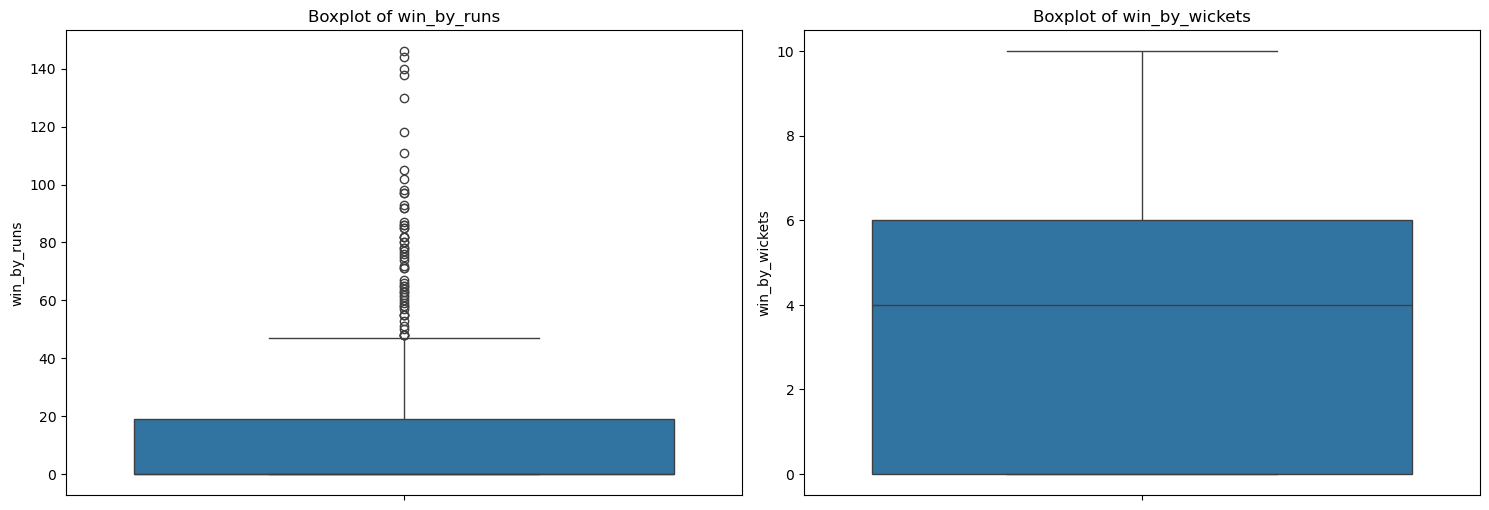

In [634]:
numerical_cols = [ 'win_by_runs', 'win_by_wickets']

plt.figure(figsize=(15, 10)) 
for i, col in enumerate(numerical_cols, 1): 
    plt.subplot(2, 2, i) 
    sns.boxplot(y=col, data=ipl)
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

**Insights**

**Win by Runs**

    -- Strong right-skew with lots of matches won by small run margins.

    -- Most teams win by small margins; massive wins are rare but highlight total dominance.

**Win by Wickets**

    -- Most matches are won by chasing sides within 6–10 wickets, with no extreme outliers.

    -- Balanced distribution → chasing team typically wins by comfortable margins.

---

**3.Exploratory Data Analysis (EDA)**

---

**UNIVARIATE ANALYSIS**

**Distribution of IPL Seasons**

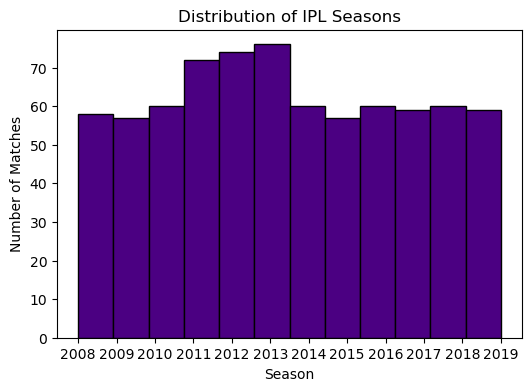

In [635]:
plt.figure(figsize=(6,4))
plt.hist(ipl['Season'], bins=len(ipl['Season'].unique()), color='indigo', edgecolor='black')
plt.title("Distribution of IPL Seasons")
plt.xlabel("Season")
plt.ylabel("Number of Matches")
plt.xticks(ipl['Season'].unique())
plt.show()

The bar chart titled **"Distribution of IPL Seasons"** shows the number of matches played per season in the **Indian Premier League (IPL)** from **2008 to 2019**.

**Initial Growth (2008–2012):**

    -- The number of matches increased steadily from 2008 to 2011.

    -- 2011 saw a notable jump, due to the addition of two new teams (Pune Warriors India and Kochi Tuskers Kerala).

**Peak Season (2013):**

    -- This season had the highest number of matches (around 76 matches).

    -- This was the peak phase of IPL in terms of match count.

**Consistent Format (2014–2019):**

    -- From 2014 onward, the number of matches dropped and stabilized around 60 matches per season.

    -- This could be due to team suspensions, restructuring, or changes in the league format.

    -- The number of matches remained fairly consistent and balanced during these years (~59-60 matches).

    -- Suggests a mature and stable tournament structure during this period.

---

**Matches Played in Each City**

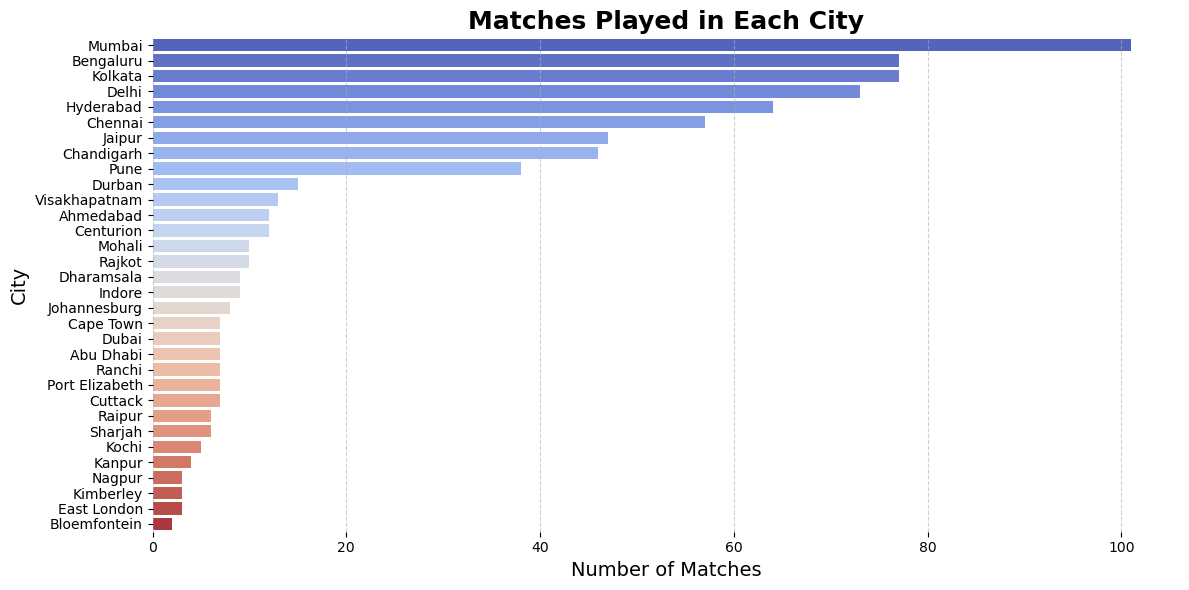

In [636]:
plt.figure(figsize=(12,6))
ax = sns.countplot(
    y='city',
    data=ipl,
    palette="coolwarm",
    order=ipl['city'].value_counts().index
)

plt.title("Matches Played in Each City", fontsize=18, weight='bold')
plt.xlabel("Number of Matches", fontsize=14)
plt.ylabel("City", fontsize=14)

sns.despine(left=True, bottom=True)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Mumbai Leads:** Mumbai has hosted over 100 matches, making it the top IPL city.

**Bengaluru & Kolkata Close Behind:** These cities regularly host exciting matches and large crowds.

**South Africa & UAE:** Johannesburg and Dubai hosted IPL matches during seasons held overseas.

**Chennai & Hyderabad:** Southern cities like Chennai and Hyderabad continue to play an important role in the IPL.

**lesser-known:** Cities like Raipur and Kochi may have fewer matches but have still created memorable moments.

---

**Tosses Won by Each Team**

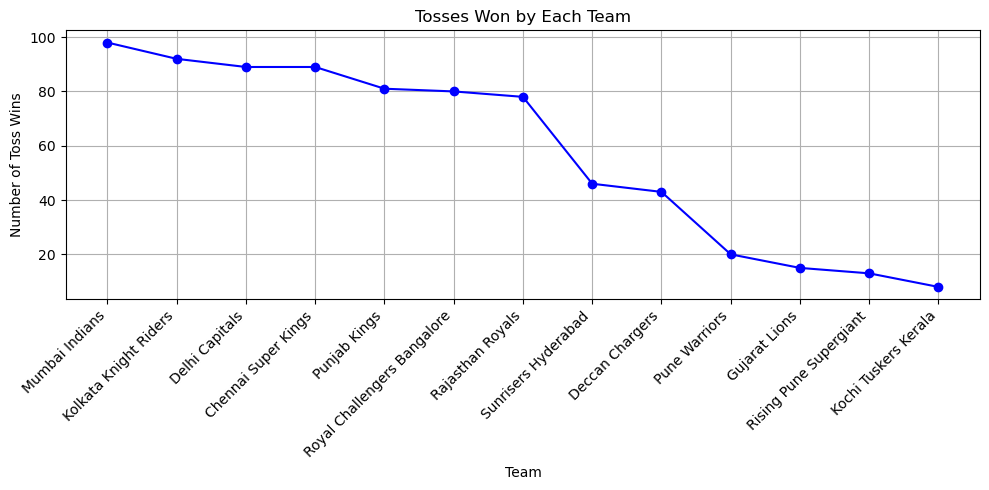

In [637]:
toss_counts = ipl['toss_winner'].value_counts()

plt.figure(figsize=(10,5))
plt.plot(toss_counts.index, toss_counts.values, marker='o', linestyle='-', color='blue')
plt.title("Tosses Won by Each Team")
plt.xlabel("Team")
plt.ylabel("Number of Toss Wins")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Mumbai Indians Rule the Toss:** With nearly 100 toss wins, Mumbai Indians are the toss kings, showing their luck and consistency across seasons.

**Kolkata and Delhi Close Behind:** Kolkata Knight Riders and Delhi Capitals are also toss winners, consistently staying in the top spots with over 80 wins.

**Chennai Super Kings Hold Strong:** Despite their dominance in the league, Chennai Super Kings still manage to win plenty of tosses, ranking high with over 70 wins.

**Fall-off After the Top 4:** After the top teams, there's a sharp drop in toss wins. Teams like Rajasthan Royals and Sunrisers Hyderabad still get their fair share, but it's a steep decline as we move down.

**Underdogs with Low Toss Wins:** The newer teams like Gujarat Lions, Rising Pune Supergiant, and Kochi Tuskers Kerala haven't been lucky with the toss, with less than 20 toss wins each!

---

**Toss Decision**

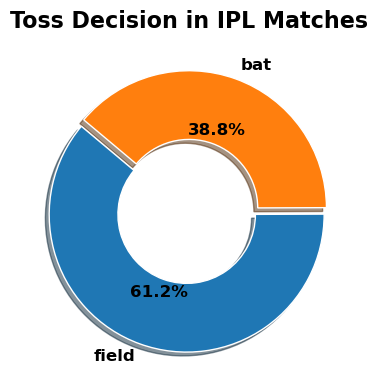

In [638]:
counts = ipl['toss_decision'].value_counts()
colors = ['#1f77b4', '#ff7f0e']  # custom colors
explode = [0.05 if i == counts.idxmax() else 0 for i in counts.index]  

plt.figure(figsize=(4,4))
plt.pie(
    counts, 
    labels=counts.index, 
    autopct=lambda p: f'{p:.1f}%', 
    startangle=140, 
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={'width':0.5, 'edgecolor':'white'},
    textprops={'fontsize':12, 'weight':'bold', 'color':'black'}
)

plt.title("Toss Decision in IPL Matches", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

    -- Most teams prefer to field first – about 61% choose fielding after winning the toss.
    
    -- Only 39% go for batting first, which shows captains usually like to chase the target.

    --This suggests teams feel more confident chasing rather than setting a score.

---

**IPL Match Outcomes**

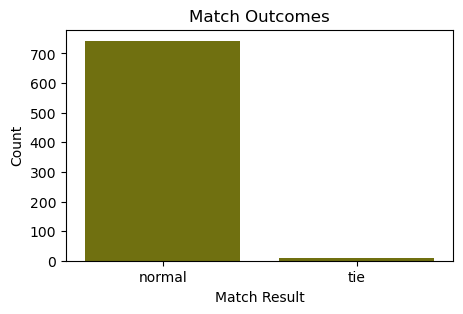

In [639]:
plt.figure(figsize=(5,3))
sns.countplot(
    x='result', 
    data=ipl, 
    order=ipl['result'].value_counts().index,
    color='olive' 
)
plt.title("Match Outcomes")
plt.xlabel("Match Result")
plt.ylabel("Count")
plt.show()

    -- Almost every IPL match ends normally – over 700 games had a clear result.

    -- Ties are extremely rare, just a handful compared to the total.

---

**DL Method Applied in IPL Matches (Duckworth-Lewis).**

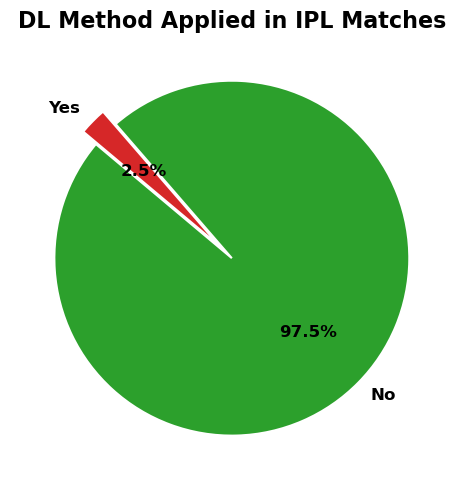

In [640]:
dl_counts = ipl['dl_applied'].value_counts()
labels = ['No', 'Yes']
colors = ['#2ca02c', '#d62728']
explode = (0, 0.1)

plt.figure(figsize=(5,5))
plt.pie(
    dl_counts.values,
    labels=labels,
    autopct='%1.1f%%',     
    startangle=140,
    colors=colors,
    explode=explode,
    wedgeprops={'edgecolor':'white', 'linewidth':1.5},
    textprops={'fontsize':12, 'weight':'bold'})

plt.title("DL Method Applied in IPL Matches", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

    -- DL method is almost never needed in IPL – only 2.5% of matches used it.

    -- An enormous 97.5% of games ran without interruptions, showing how smooth and weather-friendly IPL usually.

---

**Matches Won by Each Team**

In [641]:
import plotly.express as px

team_counts = ipl['winner'].value_counts().reset_index()
team_counts.columns = ['Team', 'Matches Won']

fig = px.bar(
    team_counts, 
    y='Team', 
    x='Matches Won',
    text='Matches Won',             
    orientation='h',                
    color='Matches Won',            
    color_continuous_scale='Plasma',
    title='Number of Matches Won by Each Team',
    labels={'Matches Won':'No. of Matches', 'Team':'Team'}
)

fig.update_traces(textposition='outside', marker_line_color='black', marker_line_width=1.5)
fig.update_layout(
    yaxis={'categoryorder':'total ascending'}, 
    template='plotly_white',                  
    margin=dict(l=100, r=20, t=80, b=50)
)

fig.show()

    -- Mumbai Indians and Chennai Super Kings are the real powerhouses, winning the most matches and leaving the rest far behind.

    -- There’s a clear “Big Four” with Mumbai, Chennai, Kolkata, and Bangalore, showing the most consistent strength in matches.

    -- Teams like Punjab and Delhi are close competitors, but they still trail the top teams by a noticeable margin.

    -- Some teams, such as Gujarat Lions, Pune Warriors, and Kochi Tuskers Kerala, have struggled to make a big impact, with only a handful of wins.

    -- The gap between the top and bottom teams is huge, highlighting dominance at the top and tough times for newcomers and short-lived teams.

---

**Top 10 Players of the Match**

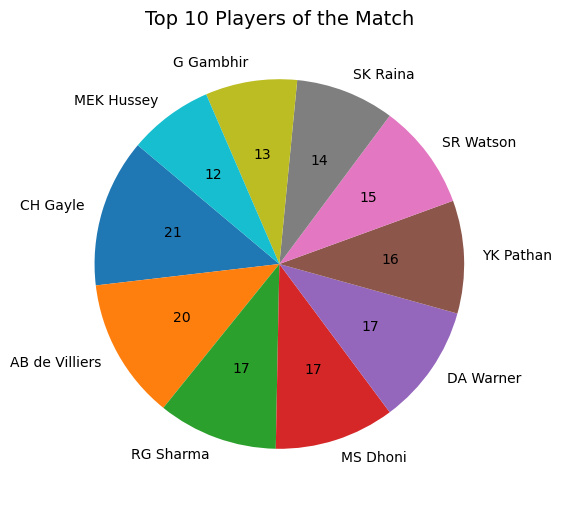

In [642]:
top_players = ipl['player_of_match'].value_counts().head(10)

plt.figure(figsize=(6,6))
plt.pie(top_players, labels=top_players.index,
        autopct=lambda pct: f"{int(round(pct/100.*sum(top_players)))}",
        startangle=140)

plt.title("Top 10 Players of the Match", fontsize=14)
plt.show()

    -- Gayle wins the most! He's the best at getting "Player of the Match."
    
    -- Four other guys are right behind him – Dhoni, Warner, de Villiers, and RG Sharma all win a lot too.
    
    -- Everyone on this list is a top player who often helps their team win.

---

**Matches Played at Each Venue**

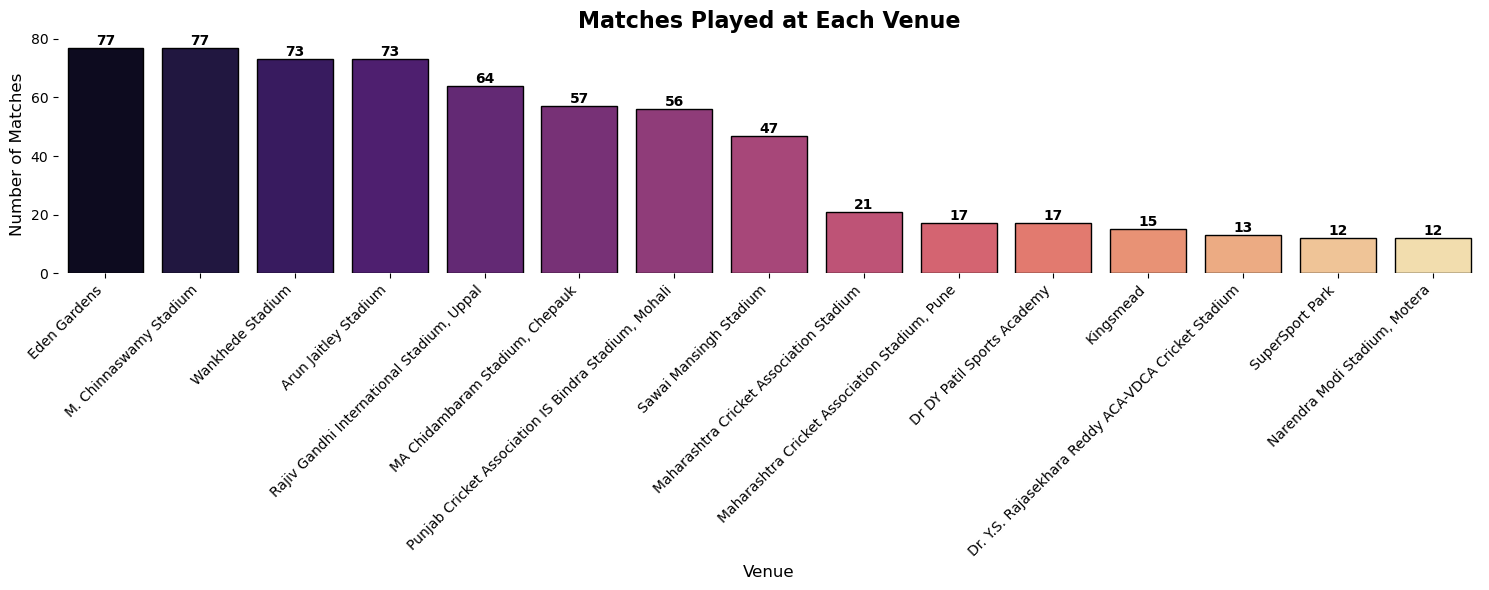

In [643]:
venue_counts = ipl['venue'].value_counts().head(15).reset_index()
venue_counts.columns = ['Venue', 'Matches']

plt.figure(figsize=(15,6))
barplot = sns.barplot(
    x='Venue',
    y='Matches',
    data=venue_counts,
    palette='magma',          
    edgecolor='black')

for p in barplot.patches:
    barplot.annotate(
        format(int(p.get_height()), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black' )

plt.title("Matches Played at Each Venue", fontsize=16, weight='bold')
plt.xlabel("Venue", fontsize=12)
plt.ylabel("Number of Matches", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

This graph shows where the most cricket matches have been played.
    
    -- M. Chinnaswamy Stadium and Eden Gardens are the busiest stadiums. They've hosted more games than anyone else.
    
    -- A few other stadiums like Arun Jaitley and Wankhede are also very popular.
    
    -- Some stadiums like Narendra Modi Stadium, SuperSport Park etc.. have hosted far fewer matches.

---

**Matches Played Each Month**

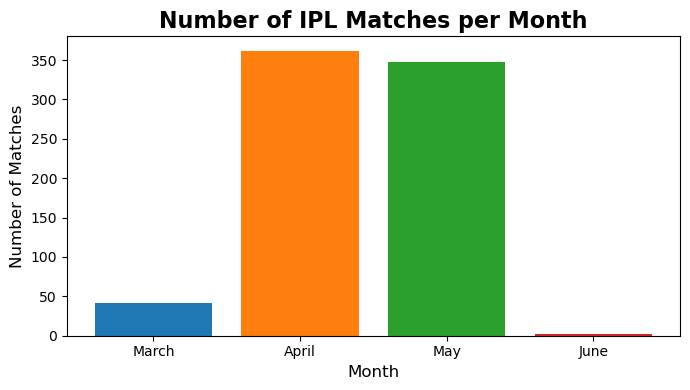

In [644]:
month_counts = ipl['month'].value_counts().sort_index()  # sort by month

month_labels = {3:'March', 4:'April', 5:'May', 6:'June'}
labels = [month_labels[m] for m in month_counts.index]

plt.figure(figsize=(7,4))
plt.bar(labels, month_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title("Number of IPL Matches per Month", fontsize=16, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Matches", fontsize=12)
plt.tight_layout()
plt.show()

    -- April & May are Peak Months: Most matches happen then because it's the climax of sports seasons (playoffs/finals) and the weather is good.
    
    -- June is Slow: Activity drops as many leagues enter their off-season or summer break.
    
    -- March is Moderate: It's an earlier stage of the season, building up to the peak.
    
    -- Clear Seasonal Pattern: Match schedules follow seasons due to weather, league structure and holidays.

---

**Bivariate Chart**

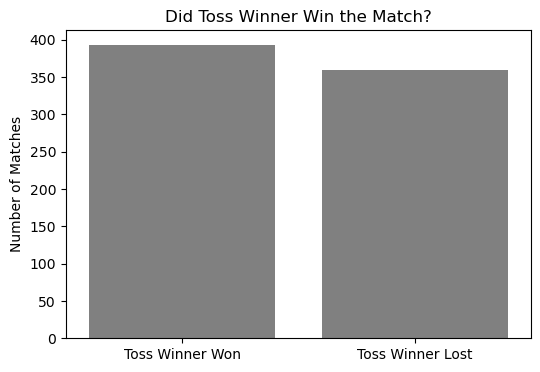

In [645]:
ipl['toss_and_match_win'] = (ipl['toss_winner'] == ipl['winner'])

toss_counts = ipl['toss_and_match_win'].dropna().value_counts().reset_index()
toss_counts.columns = ['toss_and_match_win', 'match_count']

toss_counts['toss_and_match_win'] = toss_counts['toss_and_match_win'].map({False:'Toss Winner Lost', True:'Toss Winner Won'})

plt.figure(figsize=(6,4))
sns.barplot(x='toss_and_match_win', y='match_count', data=toss_counts, color='grey')
plt.title("Did Toss Winner Win the Match?")
plt.ylabel("Number of Matches")
plt.xlabel("")
plt.show()

    -- Teams that win the coin toss usually win the game.
    
    -- But, winning the coin toss doesn't mean you'll always win; you can still lose a lot of games even if you win the toss.

---

**Teams Winning Both Toss and Match**

In [646]:
toss_and_match_wins = ipl[ipl['toss_winner'] == ipl['winner']]
print("Total matches where toss winner also won the match:", len(toss_and_match_wins))
team_counts = toss_and_match_wins['winner'].value_counts()
print(team_counts)

Total matches where toss winner also won the match: 393
winner
Chennai Super Kings            57
Mumbai Indians                 56
Kolkata Knight Riders          53
Delhi Capitals                 42
Rajasthan Royals               42
Royal Challengers Bangalore    41
Punjab Kings                   35
Sunrisers Hyderabad            23
Deccan Chargers                19
Gujarat Lions                  10
Rising Pune Supergiant          8
Kochi Tuskers Kerala            4
Pune Warriors                   3
Name: count, dtype: int64


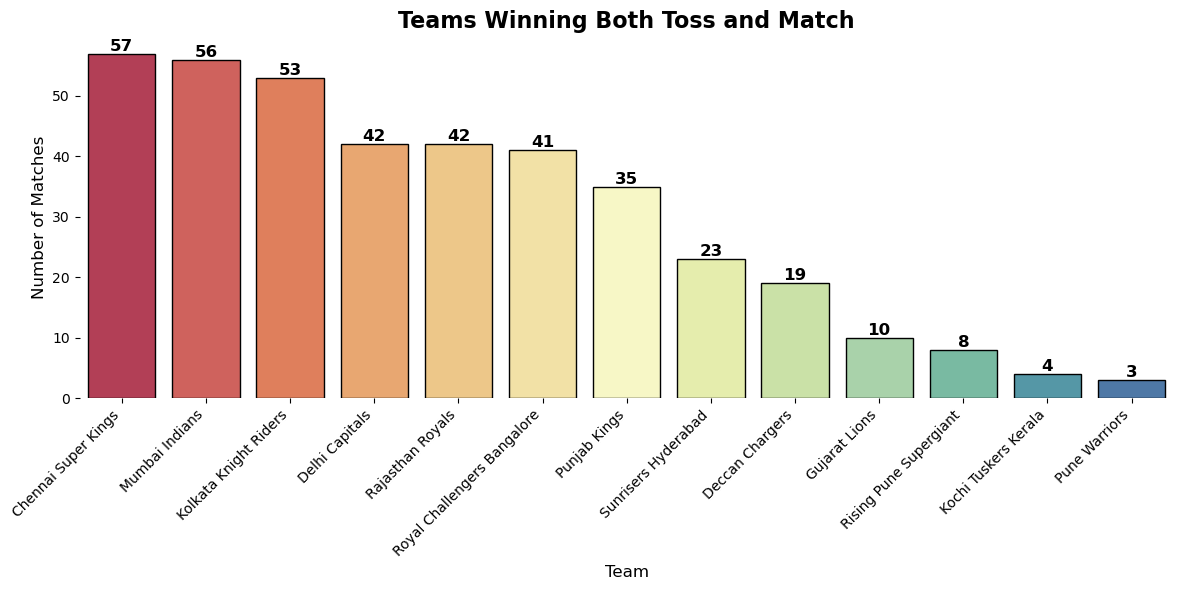

In [647]:
team_counts = ipl.loc[ipl['toss_winner'] == ipl['winner'], 'winner'].value_counts()

plt.figure(figsize=(12,6))
colors = sns.color_palette("Spectral", len(team_counts))  # vibrant colors

ax = sns.barplot(x=team_counts.index, y=team_counts.values, palette=colors, edgecolor='black')

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold')

plt.title("Teams Winning Both Toss and Match", fontsize=16, weight='bold')
plt.xlabel("Team", fontsize=12)
plt.ylabel("Number of Matches", fontsize=12)
plt.xticks(rotation=45, ha='right')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

    -- Chennai & Mumbai dominate: These two teams win the most matches even when they win the toss.
    
    -- Most teams are pretty close: Many teams sit in the middle with similar toss-win match records.
    
    -- Some struggle even after winning the toss: A few teams, especially older, shorter-lived ones, didn't often convert the toss win into a match win.
    
    -- Winning the toss helps, but talent matters more: It's not just luck; strong teams make the most of winning the toss.

---

**Wickets Won by Each Team**

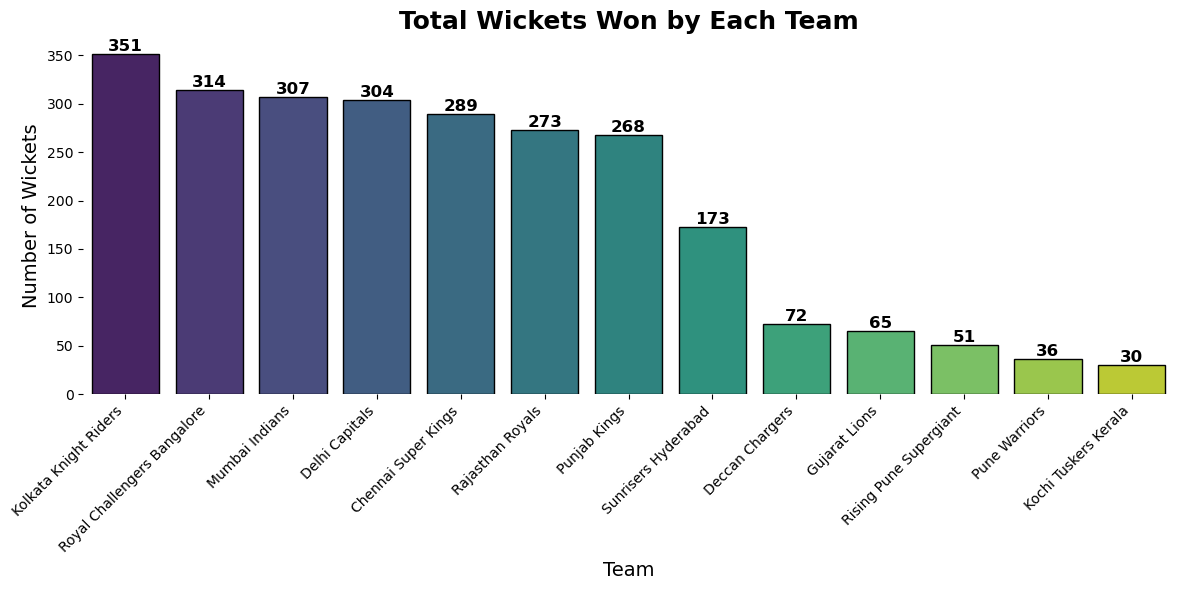

In [648]:
wickets_won = ipl.groupby('winner')['win_by_wickets'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = sns.barplot(
    x=wickets_won.index, 
    y=wickets_won.values, 
    palette="viridis", 
    edgecolor='black')

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold')

plt.title("Total Wickets Won by Each Team", fontsize=18, weight='bold')
plt.xlabel("Team", fontsize=14)
plt.ylabel("Number of Wickets", fontsize=14)
plt.xticks(rotation=45, ha='right')
sns.despine(left=True, bottom=True)  
plt.tight_layout()
plt.show()

    -- Wicket Warriors: Kolkata Knight Riders stand tall as the ultimate wicket-takers, leading the pack!
    
    -- Top Contenders: Teams like Mumbai Indians and Chennai Super Kings also show strong wicket-taking performances.
    
    -- Tail-enders: Newer or less successful teams like Kochi Tuskers Kerala lag far behind in wicket counts.

---

**Runs Won by Each Team**

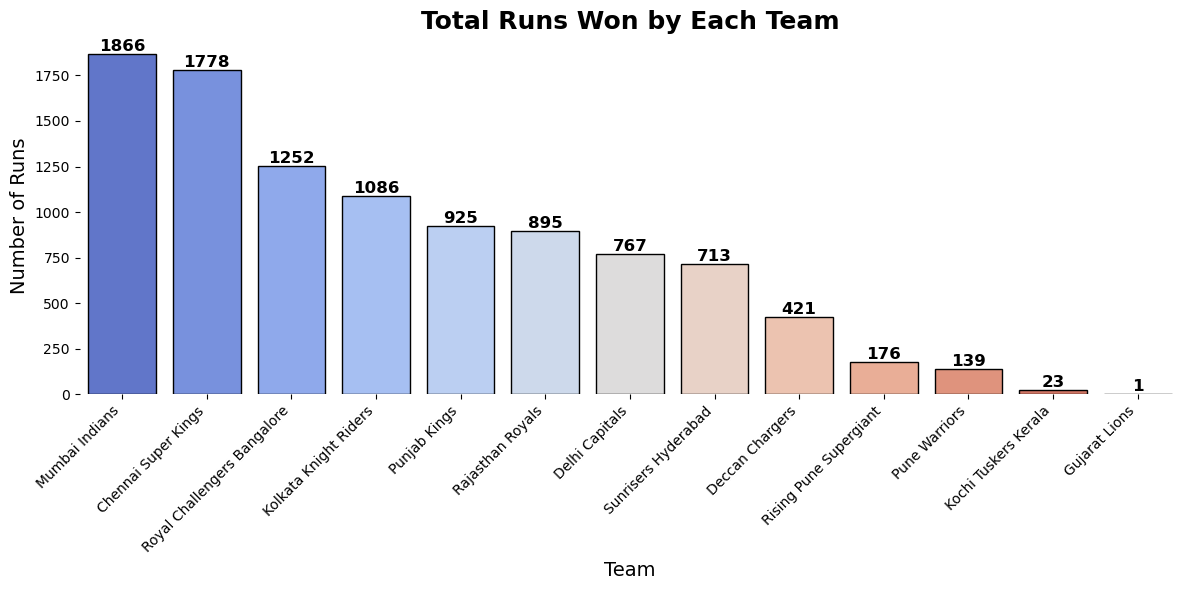

In [649]:
runs_won = ipl.groupby('winner')['win_by_runs'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))

colors = sns.color_palette("coolwarm", len(runs_won))

ax = sns.barplot(
    x=runs_won.index,
    y=runs_won.values,
    palette=colors,
    edgecolor='black')

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold' )

plt.title("Total Runs Won by Each Team", fontsize=18, weight='bold')
plt.xlabel("Team", fontsize=14)
plt.ylabel("Number of Runs", fontsize=14)
plt.xticks(rotation=45, ha='right')
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

    -- Mumbai & Chennai : These two teams are the undeniable kings of run-winning.
    
    -- The Chasing Pack: RCB and KKR consistently lead the pursuit, but haven't quite matched the top two.
    
    -- The Rest of the League: A mix of steady performers and teams with shorter or less impactful tenures.

---

**Home Wins by Each Team**

In [650]:
home_grounds = {
    "Chennai Super Kings": ["M. A. Chidambaram Stadium"],
    "Mumbai Indians": ["Wankhede Stadium", "Brabourne Stadium"],
    "Royal Challengers Bangalore": ["M. Chinnaswamy Stadium"],
    "Kolkata Knight Riders": ["Eden Gardens"],
    "Delhi Daredevils": ["Feroz Shah Kotla", "Arun Jaitley Stadium"],
    "Delhi Capitals": ["Feroz Shah Kotla", "Arun Jaitley Stadium"],
    "Rajasthan Royals": ["Sawai Mansingh Stadium"],
    "Kings XI Punjab": ["Punjab Cricket Association Stadium", "Himachal Pradesh Cricket Association Stadium"],
    "Punjab Kings": ["Punjab Cricket Association Stadium", "Himachal Pradesh Cricket Association Stadium"],
    "Sunrisers Hyderabad": ["Rajiv Gandhi International Stadium"],
    "Deccan Chargers": ["Rajiv Gandhi International Stadium"],
    "Rising Pune Supergiant": ["Maharashtra Cricket Association Stadium"],
    "Pune Warriors": ["Maharashtra Cricket Association Stadium"],
    "Gujarat Lions": ["Saurashtra Cricket Association Stadium"]}

home_wins = (ipl[ipl.apply(lambda row: row['winner'] in home_grounds 
                  and row['venue'] in home_grounds[row['winner']], axis=1)]['winner'].value_counts())

print("Home wins by each team:")
print(home_wins)

Home wins by each team:
winner
Mumbai Indians                 48
Kolkata Knight Riders          45
Royal Challengers Bangalore    37
Rajasthan Royals               32
Delhi Capitals                 31
Rising Pune Supergiant          5
Punjab Kings                    5
Gujarat Lions                   3
Name: count, dtype: int64


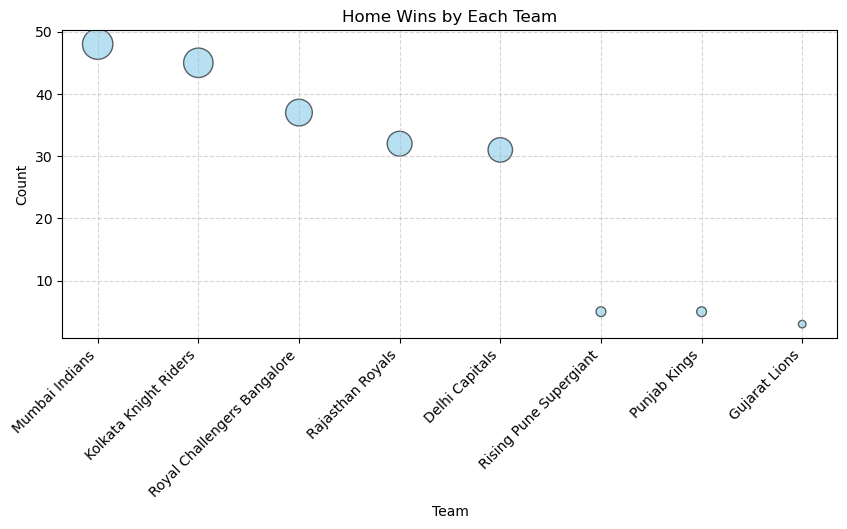

In [651]:
bubble_size = home_wins.values * 10 

plt.figure(figsize=(10,4))
plt.scatter(home_wins.index, home_wins.values, s=bubble_size, color='skyblue', alpha=0.6, edgecolor='black')
plt.title("Home Wins by Each Team")
plt.xlabel("Team")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

    -- Mumbai Indians boast the highest number of home wins near 50, showing their dominant home performance.
    
    -- Kolkata Knight Riders and Royal Challengers Bangalore follow with both teams securing over 30 home victories.
    
    -- Rajasthan Royals and Delhi Capitals also performed well, each with home wins exceeding 30.
    
    -- Rising Pune Supergiant, Punjab Kings, and Gujarat Lions recorded significantly fewer home wins, all under 10.
    
    -- The bubble size effectively visualizes the win count, making the relative home performance of each team immediately clear.

---

**Multivariate Chart**

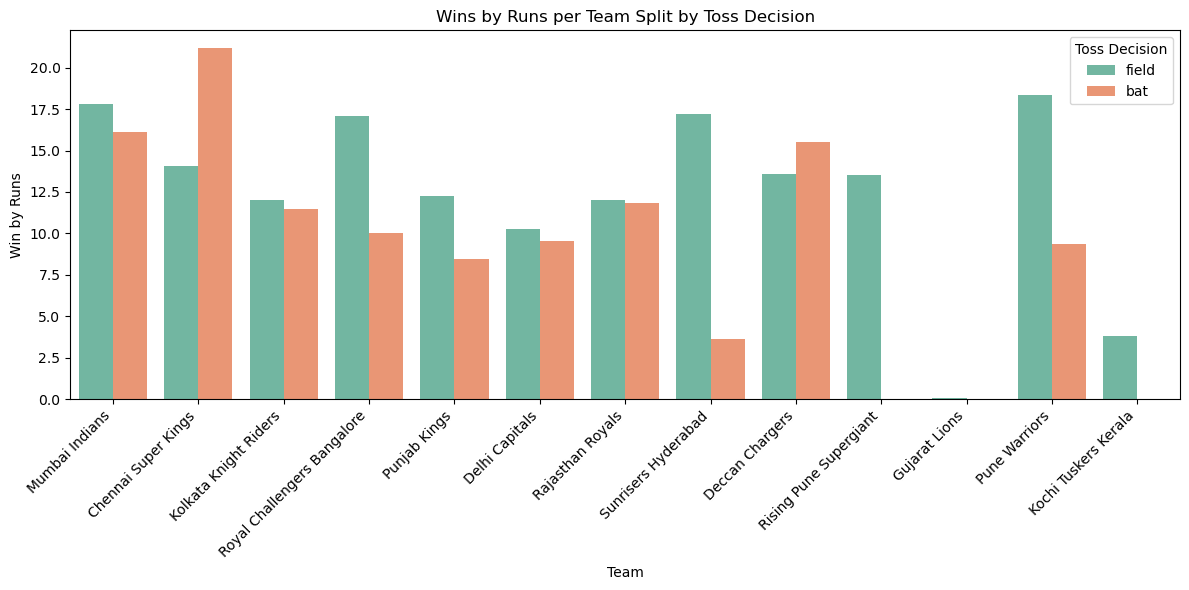

In [652]:
team_order = ipl['winner'].value_counts().index

plt.figure(figsize=(12,6))
sns.barplot(
    x='winner', 
    y='win_by_runs', 
    hue='toss_decision', 
    data=ipl,
    order=team_order, 
    palette='Set2',
    ci=None
)

plt.title("Wins by Runs per Team Split by Toss Decision")
plt.xlabel("Team")
plt.ylabel("Win by Runs")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Toss Decision')
plt.tight_layout()
plt.show()

    -- Toss Twist: Batting or fielding first matters differently for each team!
    
    -- CSK Loves Batting First: Chennai Super Kings clearly thrives setting a target.
    
    -- MI & SRH Field First Faves: Mumbai Indians and Sunrisers Hyderabad shine when chasing.
    
    -- Not All Teams are Toss-Sensitive: For many, the toss decision has a less clear impact.

---

**Correlation Heatmap**

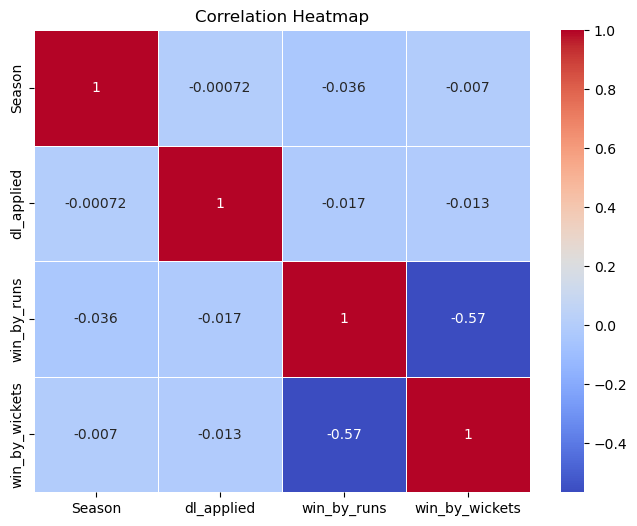

In [653]:
num_cols = ['Season', 'dl_applied', 'win_by_runs', 'win_by_wickets']

corr = ipl[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

    -- The correlation heatmap shows that win_by_runs and win_by_wickets are moderately negatively correlated (-0.56), which aligns with cricket rules (a team can either win by runs or by wickets, but not both).

    -- The dl_applied feature has negligible correlation with both, suggesting it independently affects match outcomes without directly influencing the margin of victory.

---

**IPL Trophies Won by Each Teams**

In [654]:
final_matches = ipl.groupby('Season').tail(1)
trophy_winners = final_matches[['Season', 'winner']]
print(trophy_winners)

     Season                 winner
58     2017         Mumbai Indians
116    2008       Rajasthan Royals
173    2009        Deccan Chargers
233    2010    Chennai Super Kings
305    2011    Chennai Super Kings
379    2012  Kolkata Knight Riders
455    2013         Mumbai Indians
515    2014  Kolkata Knight Riders
572    2015         Mumbai Indians
632    2016    Sunrisers Hyderabad
692    2018    Chennai Super Kings
751    2019         Mumbai Indians


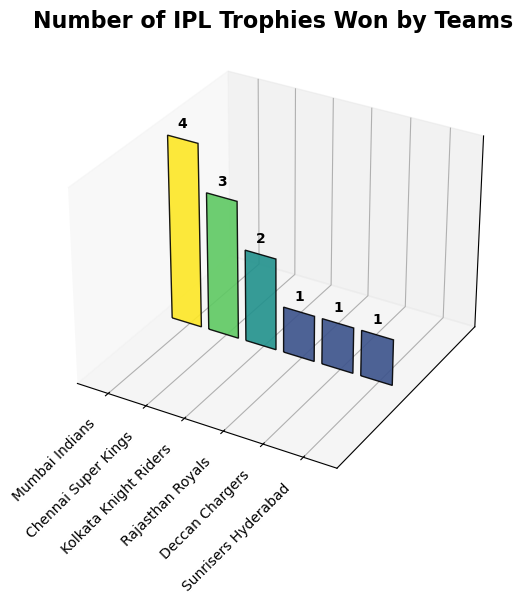

In [655]:
from mpl_toolkits.mplot3d import Axes3D

winner_counts = trophy_winners['winner'].value_counts()
teams = winner_counts.index
titles = winner_counts.values
x_pos = np.arange(len(teams))

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.viridis(titles / max(titles))

ax.bar(x_pos, titles, zs=0, zdir='y', color=colors, alpha=0.9, edgecolor='black')

ax.set_xticks(x_pos)
ax.set_xticklabels(teams, rotation=45, ha='right', fontsize=10)
ax.set_yticks([])
ax.set_zticks([])
ax.set_title('Number of IPL Trophies Won by Teams', fontsize=16, weight='bold')

for i, val in enumerate(titles):
    ax.text(x_pos[i], 0, val + 0.2, str(val), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

    -- Mumbai and Chennai: The IPL Kings! They've won the most trophies by far.
    
    -- It's a Two-Team Show: Mumbai Indians and Chennai Super Kings dominate, grabbing almost 60% of all titles shown.
    
    -- Kolkata's Strong Presence: Kolkata Knight Riders are a clear third in terms of wins.
    
    -- Other Champions: Rajasthan, Deccan, and Hyderabad each have one title under their belt in this chart.

---

**4.Data Preprocessing**

In [656]:
ipl.columns

Index(['Season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision',
       'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'player_of_match', 'venue', 'month', 'toss_and_match_win'],
      dtype='object')

In [657]:
drop_cols = ['winner', 'player_of_match', 'toss_and_match_win', 'result']

x = ipl.drop(columns=drop_cols)
y = ipl['winner'] 

In [658]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
for col in x.columns:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col].astype(str))
    encoders[col] = le
LE = LabelEncoder()
y = LE.fit_transform(y.astype(str))

In [659]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training features shape:", x_train.shape)
print("Testing features shape:", x_test.shape)

Training features shape: (601, 11)
Testing features shape: (151, 11)


---

**5.Model Training**

**LogisticRegression**

In [660]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [661]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [662]:
y_pred_logistical = model.predict(x_test)

accuracy_LR= accuracy_score(y_test, y_pred_logistical)

print("Model Accuracy:", accuracy_LR)
classification=classification_report(y_test,y_pred_logistical)
print(classification)
Matrix=confusion_matrix(y_test,y_pred_logistical)
print("confusion_matrix", Matrix)

Model Accuracy: 0.2582781456953642
              precision    recall  f1-score   support

           0       0.24      0.33      0.28        18
           1       0.00      0.00      0.00         8
           2       0.17      0.11      0.13        18
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.30      0.29      0.29        21
           6       0.17      0.33      0.23        18
           7       0.00      0.00      0.00         1
           8       0.50      0.12      0.19        17
           9       0.35      0.35      0.35        20
          10       0.00      0.00      0.00         3
          11       0.29      0.33      0.31        15
          12       0.45      0.56      0.50         9

    accuracy                           0.26       151
   macro avg       0.19      0.19      0.18       151
weighted avg       0.27      0.26      0.25       151

confusion_matrix [[6 3 3 0 0 0 3 0 1 2 0 0 0

---

**Support Vector Classifier**

In [663]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(x_train, y_train)

SVC()

In [664]:
y_pred = classifier.predict(x_test)
accuracy_SVC= accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy_SVC)
classification=classification_report(y_test,y_pred)
print(classification)
Matrix=confusion_matrix(y_test,y_pred)
print("confusion_matrix", Matrix)

Model Accuracy: 0.41721854304635764
              precision    recall  f1-score   support

           0       0.47      0.78      0.58        18
           1       0.00      0.00      0.00         8
           2       0.67      0.44      0.53        18
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.42      0.67      0.52        21
           6       0.30      0.56      0.39        18
           7       0.00      0.00      0.00         1
           8       0.22      0.12      0.15        17
           9       0.37      0.35      0.36        20
          10       0.00      0.00      0.00         3
          11       0.42      0.33      0.37        15
          12       1.00      0.33      0.50         9

    accuracy                           0.42       151
   macro avg       0.30      0.28      0.26       151
weighted avg       0.41      0.42      0.38       151

confusion_matrix [[14  0  1  0  0  1  1  0 

---

**RandomForest**

In [665]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [666]:

y_pred_RF = model.predict(x_test)
accuracy_RFC = accuracy_score(y_test, y_pred_RF)

print("Model Accuracy:", accuracy_RFC)
classification=classification_report(y_test,y_pred_RF)
print(classification)
Matrix=confusion_matrix(y_test,y_pred_RF)
print("confusion_matrix", Matrix)

Model Accuracy: 0.7947019867549668
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.50      0.67         8
           2       0.79      0.83      0.81        18
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         1
           5       0.74      0.81      0.77        21
           6       0.62      0.89      0.73        18
           7       0.00      0.00      0.00         1
           8       0.76      0.76      0.76        17
           9       0.81      0.65      0.72        20
          10       1.00      0.67      0.80         3
          11       0.92      0.73      0.81        15
          12       1.00      1.00      1.00         9

    accuracy                           0.79       151
   macro avg       0.73      0.68      0.69       151
weighted avg       0.80      0.79      0.79       151

confusion_matrix [[18  0  0  0  0  0  0  0  

---

**DecisionTree**

In [667]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [668]:
y_pred_dt = dt_clf.predict(x_test)
accuracy_DTC = accuracy_score(y_test, y_pred_dt)
conf_matrix = confusion_matrix(y_test, y_pred_dt)

print(accuracy_DTC)
print(conf_matrix)
classification=classification_report(y_test,y_pred_dt)
print(classification)

0.8278145695364238
[[14  1  1  0  0  0  0  1  0  1  0  0  0]
 [ 0  6  1  0  0  1  0  0  0  0  0  0  0]
 [ 2  0 12  1  0  0  1  1  1  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0 18  0  1  0  1  0  0  0]
 [ 1  0  0  0  0  0 17  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 14  1  0  0  2]
 [ 0  0  0  0  0  0  0  0  2 18  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  2  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  1 12  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  9]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        18
           1       0.86      0.75      0.80         8
           2       0.80      0.67      0.73        18
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         1
           5       0.95      0.86      0.90        21
           6       0.89      0.94      0.92        18
 

---

**K-Nearest Neighbors**

In [669]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  cross_val_score, KFold
k_range = range(1, 21) 
cv = KFold(n_splits=10, shuffle=True, random_state=42) 
mean_mse = [] 

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')  
    mse = cross_val_score(knn, x_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    mean_mse.append(-mse.mean())

In [670]:
best_k = k_range[np.argmin(mean_mse)]
print(f'Best K: {best_k}')

Best K: 1


In [671]:
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [672]:
y_pred_knn = knn.predict(x_test)
accuracy_KNN= accuracy_score(y_test, y_pred_knn)
print("Model Accuracy:", accuracy_KNN)
classification=classification_report(y_test,y_pred_knn)
print(classification)
Matrix=confusion_matrix(y_test,y_pred_knn)
print("confusion_matrix", Matrix)

Model Accuracy: 0.41721854304635764
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        18
           1       0.00      0.00      0.00         8
           2       0.37      0.39      0.38        18
           3       0.33      1.00      0.50         2
           4       0.00      0.00      0.00         1
           5       0.62      0.71      0.67        21
           6       0.36      0.56      0.43        18
           7       0.00      0.00      0.00         1
           8       0.43      0.35      0.39        17
           9       0.47      0.40      0.43        20
          10       0.00      0.00      0.00         3
          11       0.50      0.20      0.29        15
          12       0.30      0.33      0.32         9

    accuracy                           0.42       151
   macro avg       0.31      0.34      0.30       151
weighted avg       0.43      0.42      0.41       151

confusion_matrix [[ 9  2  2  1  0  1  2  0 

---

**Extreme Gradient Boosting (xgboost)**

In [673]:
!pip install xgboost
!pip install xgboost

In [674]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [675]:
y_pred= classifier.predict(x_test)

accuracy_XGB = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy_XGB)

classification = classification_report(y_test, y_pred)
print("Classification Report:\n", classification)

matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", matrix)

Model Accuracy: 0.9536423841059603
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.88      0.88      0.88         8
           2       0.94      0.94      0.94        18
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         1
           5       0.95      0.95      0.95        21
           6       1.00      1.00      1.00        18
           7       0.50      1.00      0.67         1
           8       1.00      1.00      1.00        17
           9       1.00      0.90      0.95        20
          10       1.00      0.67      0.80         3
          11       0.94      1.00      0.97        15
          12       1.00      1.00      1.00         9

    accuracy                           0.95       151
   macro avg       0.85      0.87      0.85       151
weighted avg       0.95      0.95      0.95       151

Confusion Matrix:
 [

---

**6.Model Evaluation**

In [676]:
print(accuracy_XGB)
print(accuracy_KNN)
print(accuracy_DTC)
print(accuracy_RFC)
print(accuracy_SVC)
print(accuracy_LR)

0.9536423841059603
0.41721854304635764
0.8278145695364238
0.7947019867549668
0.41721854304635764
0.2582781456953642


In [677]:
plot=['accuracy_XGB','accuracy_KNN','accuracy_DTC','accuracy_RFC','accuracy_SVC','accuracy_LR']
len(plot)

6

---

**7.Model Comparison**

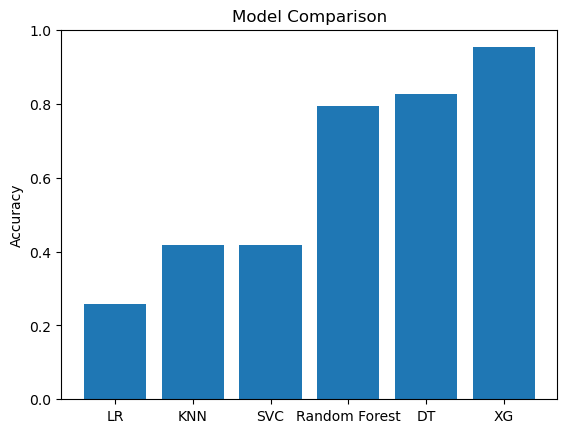

In [678]:
results = {
    "LR": (accuracy_LR),
    "KNN": accuracy_KNN,
    "SVC": accuracy_SVC,
    "Random Forest": accuracy_RFC,
    "DT":accuracy_DTC,
    "XG":accuracy_XGB
}

import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values())
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()

---

**8.Hyperparameter Tuning**

**Grid Search CV**

In [679]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'logistic': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'saga']
        }
    },
    'svm': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 2]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [3, 5, 10, None],
            'criterion': ['gini', 'entropy'],
            'min_samples_split': [2, 5, 10]
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'xgboost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.7, 1.0]
        }
    }
}

scores = []
for model_name, mp in param_grid.items():
    print(f"Training {model_name}...")
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, n_jobs=-1)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'test_accuracy': accuracy_score(y_test, clf.predict(x_test))
    })

results = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params', 'test_accuracy'])
print(results)

Training logistic...
Training svm...
Training random_forest...
Training decision_tree...
Training knn...
Training xgboost...
           model  best_score  \
0       logistic    0.271185   
1            svm    0.502452   
2  random_forest    0.795344   
3  decision_tree    0.913402   
4            knn    0.522438   
5        xgboost    0.963388   

                                         best_params  test_accuracy  
0                    {'C': 1, 'solver': 'liblinear'}       0.271523  
1       {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}       0.549669  
2  {'max_depth': None, 'min_samples_leaf': 1, 'mi...       0.781457  
3  {'criterion': 'entropy', 'max_depth': None, 'm...       0.973510  
4  {'metric': 'manhattan', 'n_neighbors': 9, 'wei...       0.543046  
5  {'learning_rate': 0.2, 'max_depth': 3, 'n_esti...       0.986755  


In [680]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("feature_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)

with open("le_target.pkl", "wb") as f:
    pickle.dump(LE, f)

In [681]:
import pickle
import pandas as pd

with open("model.pkl", "rb") as f:
    model = pickle.load(f)

with open("le.pkl", "rb") as f:
    le_target = pickle.load(f)

with open("feature_encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

with open("feature_columns.pkl", "rb") as f:
    feature_columns = pickle.load(f)

season = input("Enter Season: ").strip()
city = input("Enter City: ").strip()
team1 = input("Enter Team 1: ").strip()
team2 = input("Enter Team 2: ").strip()
toss_winner = input("Who won the toss? ").strip()
toss_decision = input("Toss decision (bat/field): ").strip()
dl_applied = input("Was DL method applied? (0 for No, 1 for Yes): ").strip()

user_input = pd.DataFrame([{
    'Season': season,
    'city': city,
    'team1': team1,
    'team2': team2,
    'toss_winner': toss_winner,
    'toss_decision': toss_decision,
    'dl_applied': dl_applied,
    'month': 0,            
    'venue': 'Unknown',     
    'win_by_runs': 0,      
    'win_by_wickets': 0     
}])

user_input = user_input[feature_columns]

for col in user_input.columns:
    le = encoders[col]
    user_input[col] = user_input[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

prediction_encoded = model.predict(user_input)[0]
predicted_winner = le_target.inverse_transform([prediction_encoded])[0]

print("\n🏏 Predicted Winner:", predicted_winner)

Enter Season:  2017
Enter City:  Hyderabad
Enter Team 1:  Sunrisers Hyderabad
Enter Team 2:  Royal Challengers Bangalore
Who won the toss?  Royal Challengers Bangalore
Toss decision (bat/field):  field
Was DL method applied? (0 for No, 1 for Yes):  0



🏏 Predicted Winner: Sunrisers Hyderabad
